In [116]:
import numpy as np
from pylab import *

0.31079999999999997


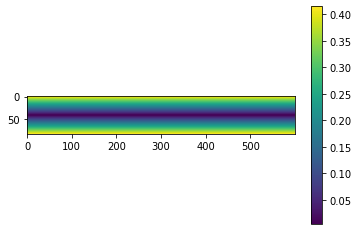

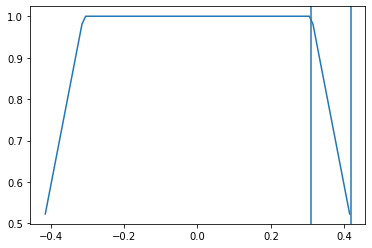

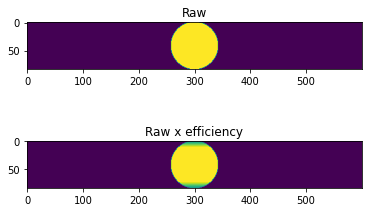

In [141]:
def make_grid(pix_as=0.01, width_as=0.85, height_as=6.01):
    """ Create a grid of width, height, and sampling as specified """
    
    Nx = int(width_as//pix_as)
    Ny = int(height_as//pix_as)
    
    g = np.zeros((Nx, Ny))

    return g

def make_meshgrid(G, pix_as):
    Nx,Ny = G.shape
    xx,yy = np.meshgrid(np.arange(Ny) * pix_as, np.arange(Nx) * pix_as)
    
    xx -= np.mean(xx)
    yy -= np.mean(yy)

    return xx,yy

def make_circ_star(G, FWHM=0.5, pix_as=0.01):
    
    xx,yy = make_meshgrid(G, pix_as)
        
    ROI = np.sqrt(xx**2 + yy**2) < FWHM/2
    star = np.zeros_like(G)
    star[ROI] = 1
    
    return star



def make_shadow_eff(G, frac=.74, pix_as=0.01):
    
    xx,yy = make_meshgrid(G, pix_as)
    
    imshow(np.abs(yy))
    colorbar()
    
    eff = np.ones_like(G)
    
    rolloff_end = G.shape[0]/2 * pix_as
    rolloff_start = rolloff_end * frac
    
    print(rolloff_start)
    
    
    figure()
    eff=shadow_curve(np.abs(yy), rolloff_start, rolloff_end)
    plot(yy[:,200], eff[:,200])
    axvline(rolloff_start)
    axvline(rolloff_end)
    return eff

def shadow_curve(x, rolloff_start, rolloff_end):
    """ The shadow of the slit curve """
    
    m = 0.5/(rolloff_end-rolloff_start)
    
    y = -m*x + (1+m*rolloff_start)
    y[x <= rolloff_start] = 1
    
    return y

    
G = make_grid()
eff = make_shadow_eff(G)

figure()
S = make_circ_star(G, FWHM=.85)


subplot(2,1,1) 
title("Raw")
imshow(S)
subplot(2,1,2)
title("Raw x efficiency")
imshow(S*eff)

In [136]:
T = S*eff

In [128]:
T.shape

(84, 600)

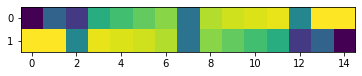

In [134]:
imshow(T.reshape(2,15,1680).mean(-1))

In [138]:
.35 * 7 * 60

146.99999999999997

In [139]:
146/22000

0.006636363636363636

- Fractional light through from drew
- Zemax sims of night sky lines
